<a href="https://colab.research.google.com/github/PaulToronto/Math-and-Data-Science-Reference/blob/main/Scikit_learn_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn Confusion Matrix

[sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/PaulToronto/datasets/master/titanic.csv')

titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
features = ['fare', 'age', 'sex', 'pclass', 'sibsp', 'parch']

X = pd.get_dummies(titanic[features], drop_first=True)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [3]:
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[227,  31],
       [ 51, 123]])

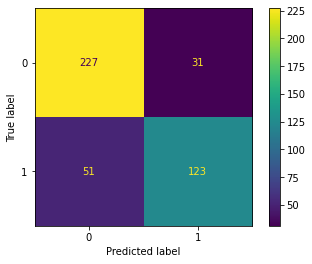

In [4]:
conf_m_disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, 
                                     display_labels = model.classes_)

conf_m_disp.plot();

### Accuracy, Precision, Recall, F1

- **True Positive**, **True Negative**, **False Positive** and **False Negative** all depend on which label is considered positive

In [5]:
# Assumption: 1 is positive
TN1 = conf_m[0, 0] # actual label is negative, predicted negative
FP1 = conf_m[0, 1] # actual label is negative, predivited positive
FN1 = conf_m[1, 0] # actual label is positive, predicted negative
TP1 = conf_m[1, 1] # actual label is positive, predicted positive

# Assumption: 0 is positive
TP0 = conf_m[0, 0] # actual label is positive, predicted positive
FN0 = conf_m[0, 1] # actual label is positive, predicted negative
FP0 = conf_m[1, 0] # actual label is negative, predicted positive
TN0 = conf_m[1, 1] # actual label is negative, predicted negative

Total = conf_m.sum()
Total

432

#### Accuracy

$$
Accuracy = \frac{TP + TN}{Total}
$$

In [6]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8101851851851852

In [7]:
(TP1 + TN1) / Total

0.8101851851851852

In [8]:
(TP0 + TN0) / Total

0.8101851851851852

#### Precision

$$
Precision = \frac{TP}{TP + FP}
$$

- denominator is all predicted true

In [9]:
# pos_label=1 is the default
precision_1 = precision_score(y_test, y_pred)
precision_1

0.7987012987012987

In [10]:
TP1 / (TP1 + FP1) 

0.7987012987012987

In [11]:
precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_0

0.8165467625899281

In [12]:
TP0 / (TP0 + FP0)

0.8165467625899281

#### Recall

$$
Recall = \frac{TP}{TP + FN}
$$

- denominator is all the actual true

In [13]:
# pos_label=1 is the default
recall_1 = recall_score(y_test, y_pred)
recall_1

0.7068965517241379

In [14]:
TP1 / (TP1 + FN1)

0.7068965517241379

In [15]:
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_0

0.8798449612403101

In [16]:
TP0 / (TP0 + FN0)

0.8798449612403101

#### F1

The harmonic mean of precision and recall. Ranges from 0 to 1, with 1 being the best score.

$$
F1 = 2\times\frac{precision \times recall}{precision + recall}
$$

In [17]:
# pos_label=1 is the default
f1_score_1 = f1_score(y_test, y_pred)
f1_score_1

0.75

In [18]:
2 * (precision_1 * recall_1) / (precision_1 + recall_1)

0.75

In [19]:
f1_score_0 = f1_score(y_test, y_pred, pos_label=0)
f1_score_0

0.8470149253731343

In [20]:
2 * (precision_0 * recall_0) / (precision_0 + recall_0)

0.8470149253731343

### Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       258
           1       0.80      0.71      0.75       174

    accuracy                           0.81       432
   macro avg       0.81      0.79      0.80       432
weighted avg       0.81      0.81      0.81       432



In [22]:
print(np.round(precision_0, 2), 
      np.round(recall_0, 2), 
      np.round(f1_score_0, 2), 
      conf_m[0].sum())

0.82 0.88 0.85 258


In [23]:
print(np.round(precision_1, 2), 
      np.round(recall_1, 2), 
      np.round(f1_score_1, 2), 
      conf_m[1].sum())

0.8 0.71 0.75 174


In [24]:
print(np.round(accuracy, 2), conf_m.sum())

0.81 432
